- Keras
- MNIST

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

In [ ]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Số này là : 5


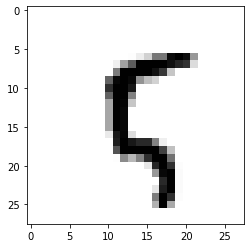

In [ ]:
hinh = train_images[100]
plt.imshow(hinh, cmap=plt.cm.binary)
plt.show
print('Số này là :', train_labels[100])

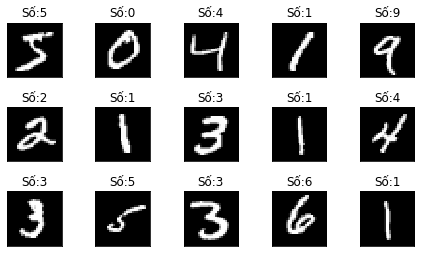

In [ ]:
for i in range(15) :
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title('Số:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

- 1 tấm ảnh sẽ tách ra 3 hình kênh R-G-B
- 60.000 tấm ảnh
- Có 1 tín hiệu ra => (60000,)
- Giá trị dải màu ảnh vào là [0,255] tức là 256 giá trị

In [ ]:
model = Sequential()
#Lớp đầu tiên
model.add(Dense(512, activation='relu', input_shape=(28*28,), name='Class1'))   #luôn khai báo lớp đầu tiên là (28*28,) : chỉ có 1 chiều
#Lớp thứ 2
model.add(Dense(10, activation='softmax', name='Class2'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Class1 (Dense)              (None, 512)               401920    
                                                                 
 Class2 (Dense)              (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images = train_images.reshape((60000,28*28))   #ảnh 2D => reshape 60000 tấm ảnh => ko còn 2D : cắt từng pixel thành chuỗi nhị phân
train_images = train_images.astype('float32')/255    

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

#print(train_labels)
#print(test_labels)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10,batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Do Chinh Xac tren tap kiem tra : ', test_acc)
print('Ham mat mat tren tap kiem tra : ', test_loss)

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 2.8951e-04 - accuracy: 1.0000
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 2.6183e-04 - accuracy: 1.0000
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 2.3778e-04 - accuracy: 1.0000
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 2.1859e-04 - accuracy: 1.0000
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 2.0169e-04 - accuracy: 1.0000
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 1.8902e-04 - accuracy: 1.0000
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 1.7661e-04 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 1.6673e-04 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 1.5603e-04 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 

In [ ]:
model.save('model1.h5')

#model11 = load_model('model1.h5')

#model11.predict(test_images[51])

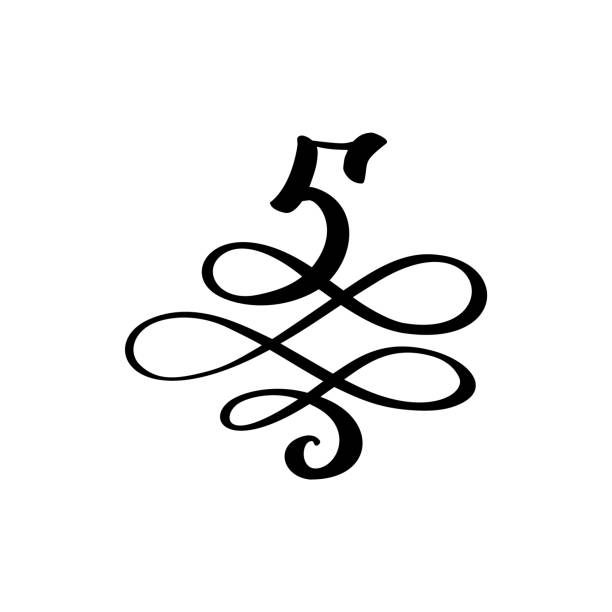

In [ ]:
url = 'so5.jpg'
img = load_img(url)
img.show()

In [ ]:
img = load_img(url, target_size=(28,28))
img = img_to_array(img)
img = img[:,:,0]
img = img.reshape(1,28*28)
img = img.astype('float32')/255
np.argmax(model.predict(img), axis=1)

1/1 [==============================] - 0s 39ms/step


array([8])

- MNIST : đưa ảnh 1 kênh
- cifar 10, 100
- fashion mnist